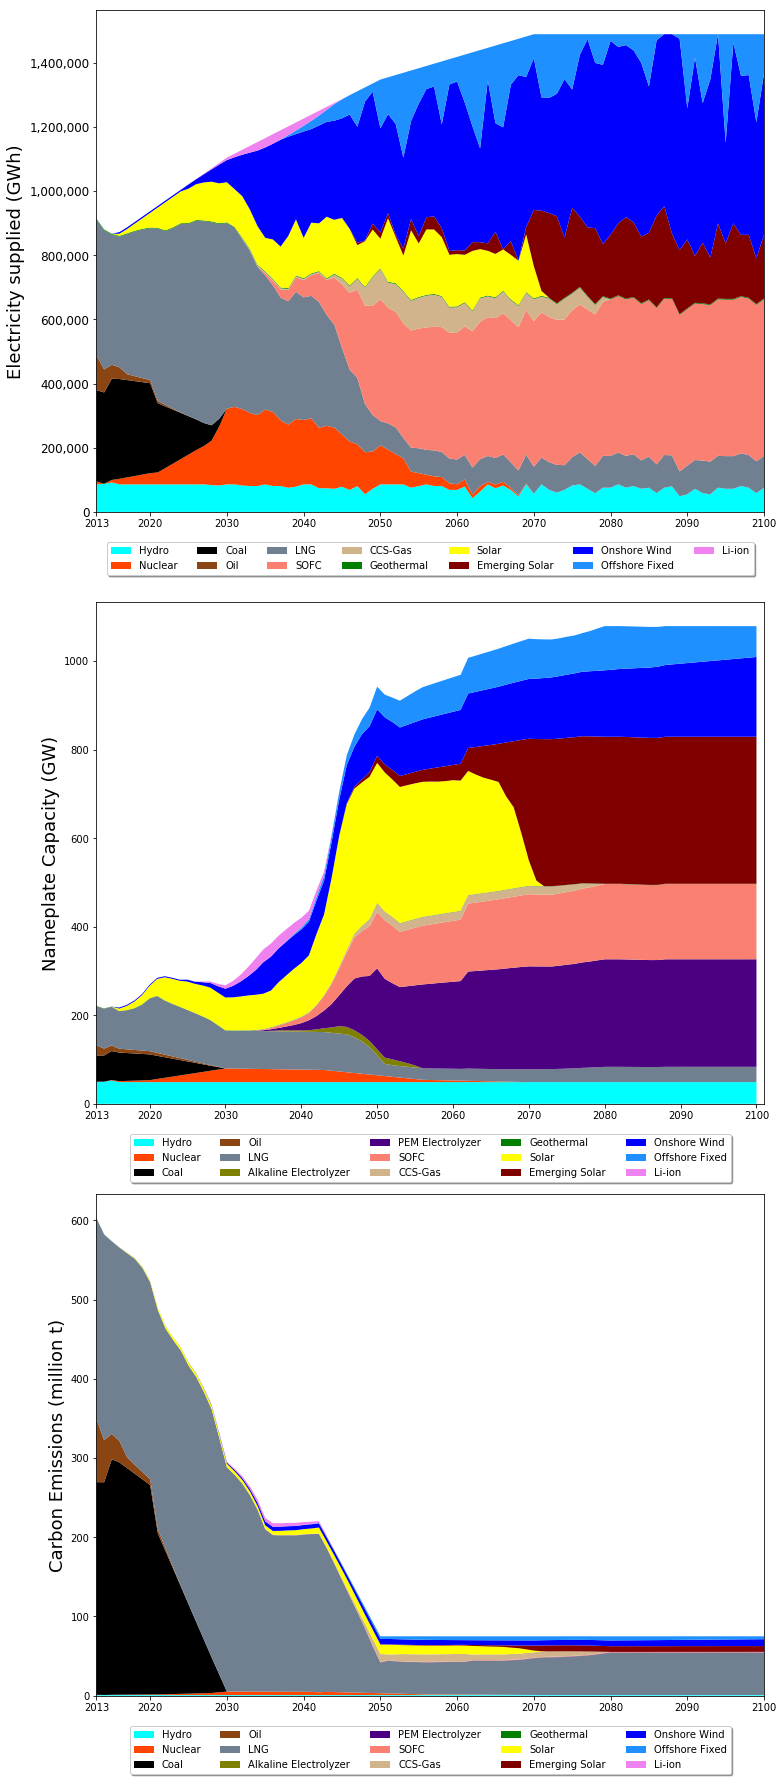

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import OrderedDict 
%matplotlib inline

fname='elc_output.csv'
colfilter = ['Process','Period','PV']
xlocs = [2013]
xlocs=xlocs+list(np.arange(2020,2101,10))

a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum() #sum values for same period, process
a=a.reset_index()
a.set_index('Period', inplace=True)

procs = a.Process.unique()
newyrs=pd.Series(range(2013,2101))
pltdict=OrderedDict()

for prc in procs:
    b=a.loc[a['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict[prc]=b['PV']
#a.to_csv('df_test.csv', sep='\t')
#print(procs)

ordlegend=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'SOFC','CCS-Gas',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind','Offshore Fixed',#,'Offshore Floating',
           'Li-ion'
          ]
colours = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'salmon','tan',
           'green','yellow','maroon',
           'blue','dodgerblue',#,'teal',
          'violet'
          ]
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10, 24))
fig.tight_layout() 
fig.subplots_adjust(hspace=0.18)
pltyrs=range(2013,2101)
ax1.stackplot(pltyrs,  pltdict['FTE-DIMEHYD13'],pltdict['FTE-DIMEONUC13'],
             pltdict['ELCTECOA'],pltdict['ELCTEOIL'], pltdict['ELCTELNG']+pltdict['FTE-DIMECC17'],
              pltdict['SOFC30'], pltdict['FTE-DIMECCSG22'],
             pltdict['ELCTEGEO'],
           pltdict['ELCTEPVS']+pltdict['FTE-DIMEPVN17'],pltdict['FTE-DIMESOL17'],
               pltdict['ELCTEWND']+pltdict['FTE-DIMEWON17'],pltdict['FTE-DIMEWOFX17'],#pltdict['FTE-DIMEWOFL19'],
              pltdict['FTE-ELCSTG17'],
             labels=ordlegend, colors=colours)
ax1.tick_params(axis="x", labelsize=10)
ax1.tick_params(axis="y", labelsize=12)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.set_xlim((2013, 2100))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=7)
#ax1.set_xlabel('Years',fontsize='18')
ax1.set_ylabel('Electricity supplied (GWh)',fontsize='18')
ax1.set_xticks(ticks=xlocs)

fname='co2_emi_sources.csv'
colfilter = ['Process','Period','PV']

cdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
cdf = cdf[colfilter]
cdf=cdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
cdf=cdf.reset_index()
cdf.set_index('Period', inplace=True)

procs2 = cdf.Process.unique()
pltdict2={}

for prc in procs2:
    c=cdf.loc[cdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict2[prc]=c['PV']
#print(procs2)

fname='net_cap.csv'
colfilter = ['Process','Period','PV']

capdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
capdf = capdf[colfilter]
capdf=capdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
capdf=capdf.reset_index()
capdf.set_index('Period', inplace=True)

procs3 = capdf.Process.unique()
pltdict4={}

for prc in procs3:
    c=capdf.loc[capdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict4[prc]=c['PV']
#print(procs3)

ordlegend2=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'Alkaline Electrolyzer','PEM Electrolyzer','SOFC',
            'CCS-Gas',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind','Offshore Fixed',
           'Li-ion'
          ]
           
colours2 = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'olive','indigo','salmon',
            'tan',
           'green','yellow','maroon',
           'blue','dodgerblue',
          'violet'
          ]
          
pltyrs2=range(2013,2101)
l2 = ax2.stackplot(pltyrs2, pltdict4['ELCTEHYD'],pltdict4['ELCTENUC'],
             pltdict4['ELCTECOA'],pltdict4['ELCTEOIL'], pltdict4['ELCTELNG']+pltdict4['ELCCC17'],
              pltdict4['ECALK22'],pltdict4['ECPEM22'],pltdict4['SOFC30'],
                   pltdict4['LNGCCS22'],
           pltdict4['ELCTEGEO'],
           pltdict4['ELCTEPVS']+pltdict4['ELCPVN17'],pltdict4['EMSOL17'],
               pltdict4['ELCTEWND']+pltdict4['ELCWON17'],pltdict4['ELCWOFX17'],
              pltdict4['STGLION17'],
             labels=ordlegend2, colors=colours2)
ax2.set_xlim((2013, 2101))
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=5)
ax2.set_ylabel('Nameplate Capacity (GW)',fontsize='18')
ax2.set_xticks(ticks=xlocs)

ordlegend3=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'Alkaline Electrolyzer','PEM Electrolyzer','SOFC',
            'CCS-Gas',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind','Offshore Fixed',
           'Li-ion'
          ]
colours3 = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'olive','indigo','salmon',
            'tan',
           'green','yellow','maroon',
           'blue','dodgerblue',
          'violet'
          ]
pltyrs3=range(2013,2101)
ax3.stackplot(pltyrs3, pltdict2['ELCTEHYD'],pltdict2['ELCTENUC'],
             pltdict2['ELCTECOA'],pltdict2['ELCTEOIL'], pltdict2['ELCTELNG']+pltdict2['ELCCC17'],
              pltdict2['FTE-EALKH22'],pltdict2['FTE-EPEMH22'],pltdict2['SOFC30'],
              pltdict2['LNGCCS22'],
             pltdict2['ELCTEGEO'],
           pltdict2['ELCTEPVS']+pltdict2['ELCPVN17'],pltdict2['EMSOL17'],
               pltdict2['ELCTEWND']+pltdict2['ELCWON17'],pltdict2['ELCWOFX17'],
              pltdict2['FTE-ELCSTG17'],    
             labels=ordlegend3, colors=colours3)
ax3.set_xlim((2013, 2100))
ax3.set_ylabel('Carbon Emissions (million t)',fontsize='18')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=5)
ax3.set_xticks(ticks=xlocs)

fig.savefig('newtechs_nonuc.png',bbox_inches='tight', dpi=300)

In [13]:
fname='selc_sources.csv'
colfilter = ['Process','Period','PV']

sdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
sdf = sdf[colfilter]
sdf=sdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
sdf=sdf.reset_index()
sdf.set_index('Period', inplace=True)

procs4 = sdf.Process.unique()
pltdict4={}
stgperc={}
stgsum=0

for prc in procs4:
    s=sdf.loc[sdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict4[prc]=s['PV']
    stgsum+=(pltdict4[prc].sum())    

print('Total storage electricity:',stgsum)
for prc in procs4:
    stgperc[prc]=(pltdict4[prc].sum())/stgsum
    print('Process:',prc)
    print('Percentage:',stgperc[prc]*100)

Total storage electricity: 43877818.71624932
Process: FTE-SIMECC17
Percentage: 1.583282619282909
Process: FTE-SIMECCSG22
Percentage: 0.664241421355367
Process: FTE-SIMEHYD17
Percentage: 1.894429216346851
Process: FTE-SIMEONUC17
Percentage: 0.9235188970069398
Process: FTE-SIMEPVN17
Percentage: 19.477205964995033
Process: FTE-SIMESOL17
Percentage: 28.18458690618434
Process: FTE-SIMEWOFX17
Percentage: 27.5254928466572
Process: FTE-SIMEWON17
Percentage: 19.747242128171358


In [18]:
fname='h2_sources.csv'
colfilter = ['Process','Period','PV']

hdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
hdf = hdf[colfilter]
hdf=hdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
hdf=hdf.reset_index()
hdf.set_index('Period', inplace=True)

procs5 = hdf.Process.unique()
pltdict5={}
h2perc={}
h2sum=0

for prc in procs5:
    h=hdf.loc[hdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict5[prc]=h['PV']
    h2sum+=(pltdict5[prc].sum())  

print('Total H2:',h2sum)
for prc in procs5:
    h2perc[prc]=(pltdict5[prc].sum())/h2sum
    print('Process:',prc)
    print('Percentage:',h2perc[prc]*100)

Total H2: 35477751.967588924
Process: FTE-EALKH22
Percentage: 0.9888068436168573
Process: FTE-EPEMH22
Percentage: 99.01119315638314
